In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import koreanize_matplotlib

In [2]:
# 데이터 로드
iris = load_iris()
X = iris.data
Y = iris.target

In [3]:
X.shape

(150, 4)

In [4]:
## PCA 적용해보기
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)

In [5]:
X_pca.shape

(150, 2)

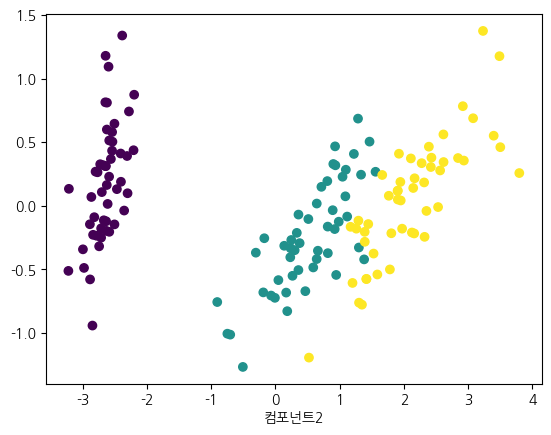

In [6]:
## 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.xlabel("컴포넌트1")
plt.xlabel("컴포넌트2")
plt.show()

## 1. 랜덤포레스트로 분류 모델 만들어보기
- 원본 데이터로 만들어보기
- pca 한 데이터로 만들어보기

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. 랜덤포레스트로 분류 모델 만들어보기

# 원본 데이터로 모델 만들기
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

rf_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_original.fit(X_train, y_train)

y_pred_original = rf_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

print("원본 데이터 모델의 정확도:", accuracy_original)

# PCA 데이터로 모델 만들기
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)

rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_pca_train, y_train)

y_pred_pca = rf_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("PCA 데이터 모델의 정확도:", accuracy_pca)

원본 데이터 모델의 정확도: 1.0
PCA 데이터 모델의 정확도: 0.9777777777777777


## 2. Decision Tree로 만들어보기
- 원본 데이터로 만들어보기
- pca 한 데이터로 만들어보기

In [8]:
from sklearn.tree import DecisionTreeClassifier

# 2. Decision Tree로 만들어보기

# 원본 데이터로 모델 만들기
dt_original = DecisionTreeClassifier(random_state=42)
dt_original.fit(X_train, y_train)

y_pred_dt_original = dt_original.predict(X_test)
accuracy_dt_original = accuracy_score(y_test, y_pred_dt_original)

print("Decision Tree - 원본 데이터 모델의 정확도:", accuracy_dt_original)

# PCA 데이터로 모델 만들기
dt_pca = DecisionTreeClassifier(random_state=42)
dt_pca.fit(X_pca_train, y_train)

y_pred_dt_pca = dt_pca.predict(X_pca_test)
accuracy_dt_pca = accuracy_score(y_test, y_pred_dt_pca)

print("Decision Tree - PCA 데이터 모델의 정확도:", accuracy_dt_pca)

Decision Tree - 원본 데이터 모델의 정확도: 1.0
Decision Tree - PCA 데이터 모델의 정확도: 0.9777777777777777


## 3. xgboost로 만들어보기
- 원본 데이터로 만들어보기
- pca 한 데이터로 만들어보기

In [9]:
from xgboost import XGBClassifier

X_pca_train, X_pca_test, y_train_pca, y_test_pca = train_test_split(X_pca, Y, test_size=0.3, random_state=42)


# 3. XGBoost로 만들어보기
xgb_original = XGBClassifier(random_state=42)
xgb_original.fit(X_train, y_train)
xgb_pca = XGBClassifier(random_state=42)
xgb_pca.fit(X_pca_train, y_train_pca)

print("XGBoost - 원본 데이터 모델의 정확도:", accuracy_score(y_test, xgb_original.predict(X_test)))
print("XGBoost - PCA 데이터 모델의 정확도:", accuracy_score(y_test_pca, xgb_pca.predict(X_pca_test)))


XGBoost - 원본 데이터 모델의 정확도: 1.0
XGBoost - PCA 데이터 모델의 정확도: 0.9777777777777777
